## Exercises:
* Record two different voices, or use recordings from two different people, preferably a male and a female voice or people speaking in different languages. The recordings should be at least 30 seconds long.
* Calculate the envelope spectrum of the speech signal and compare the two recordings.
* Filter the speech signals using low pass filters with cut-off frequencies at 4000, 2000, and 1000 Hz. Describe the differences in perception and intelligibility between the unfiltered and the filtered signals.

In [18]:
# Importing packages and libraries
from scipy.io.wavfile import write
from scipy.signal import butter, lfilter, freqz, hilbert
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import numpy as np
import pyaudio

In [19]:
def audio_properties(audio):
    
    data, Fs = sf.read(audio)
    samples = len(data)
    if len(data.shape) > 1:
        channels = data.shape[1]
    else:
        channels = 1
    duration = samples / Fs
    time = np.arange(samples) / samples * duration  # Create an array of 0 to 'samples -1'
                                                    # Normalize the values from 0-1
                                                    # Multiply by duration to scale the actual time

    print(f"Samples/Sample points: {samples}")
    print(f"Channels: {channels}")
    print(f"Sample rate: {Fs}")
    print(f"Data type: {data.dtype}")
    print(f"Duration: {duration}")
    print(f"Time: {time}\n")
    
    return data, Fs, samples, time

In [20]:
# Retrieve audio properties
audio1 = "Recordings/danish_recording.mp3"
audio2 = "Recordings/vikki_greek.mp3"


#print(sf.info(audio1), "\n")
data1, Fs1, samples1, time1 = audio_properties(audio1)
#print(sf.info(audio2), "\n")
data2, Fs2, samples2, time2 = audio_properties(audio2)

Samples/Sample points: 1725440
Channels: 2
Sample rate: 48000
Data type: float64
Duration: 35.946666666666665
Time: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.59466042e+01
 3.59466250e+01 3.59466458e+01]

Samples/Sample points: 1865728
Channels: 1
Sample rate: 48000
Data type: float64
Duration: 38.86933333333333
Time: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.88692708e+01
 3.88692917e+01 3.88693125e+01]



In [21]:
def envelope_spectrum(signal, fs):
    # Calculate the analytic signal using the Hilbert transform
    analytic_signal = hilbert(signal)
    
    # Compute FFT
    fft = np.fft.fft(analytic_signal)
    
    # Compute the magnitude of the analytic signal
    envelope = np.abs(analytic_signal)
    
    # Calculate the frequency axis - for only positive values apply [:n//2]
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)[:n//2]
    
    return freq, envelope[:n//2]

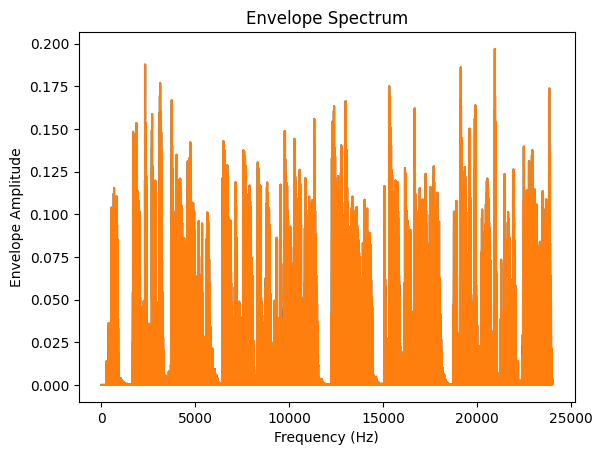

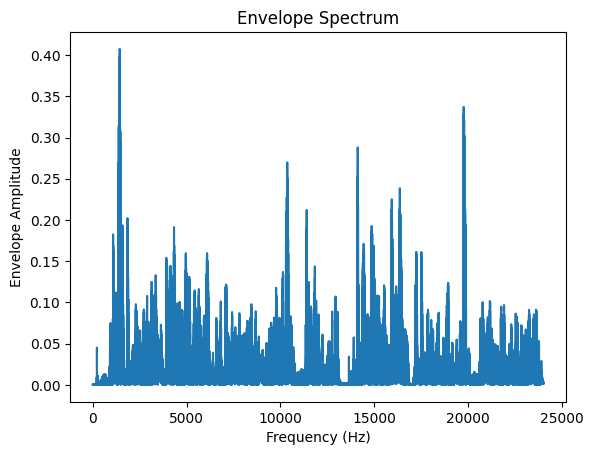

In [22]:
freq1, envelope1 = envelope_spectrum(data1, Fs1)
freq2, envelope2 = envelope_spectrum(data2, Fs2)

# Plot the envelope spectrum
plt.plot(freq1, envelope1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Envelope Amplitude')
plt.title('Envelope Spectrum')
plt.show()

# Plot the envelope spectrum
plt.plot(freq2, envelope2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Envelope Amplitude')
plt.title('Envelope Spectrum')
plt.show()

In [23]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    # Design Butterworth LP filter
    b, a = butter(order, cutoff, fs=fs, btype='low', analog=False)
    
    # Apply filter to data
    y = lfilter(b, a, data)
    
    return y

cutoff = [4000, 2000, 1000]
freqs1 = []
freqs2 = []  
envelopes1 = []  
envelopes2 = []
filtered_data1 = []
filtered_data2 = []
for freq_cutoff in cutoff:
    # Apply LP filter at cutoff freq 4000, 2000, 1000
    data1_LP = butter_lowpass_filter(data1,freq_cutoff,Fs1)
    data2_LP = butter_lowpass_filter(data2,freq_cutoff,Fs2)
    filtered_data1.append(data1_LP)
    filtered_data2.append(data2_LP)

    # Calculate envelope spectrum
    freq1, envelope1 = envelope_spectrum(data1_LP, Fs1)
    freq2, envelope2 = envelope_spectrum(data2_LP, Fs2)
    
    # Append data
    freqs1.append(freq1)
    freqs2.append(freq2)
    envelopes1.append(envelope1)
    envelopes2.append(envelope2)

In [24]:
def plot_cutoff(freqs, envelopes, cutoff):
    for i in range(len(freqs)):
        plt.figure()
        plt.plot(freqs[i], envelopes[i])
        plt.title(f'Envelope Spectrum (Cutoff {cutoff[i]} Hz)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Envelope Amplitude')
        plt.grid()

Length of freqs1: 3
Length of envelopes1: 3


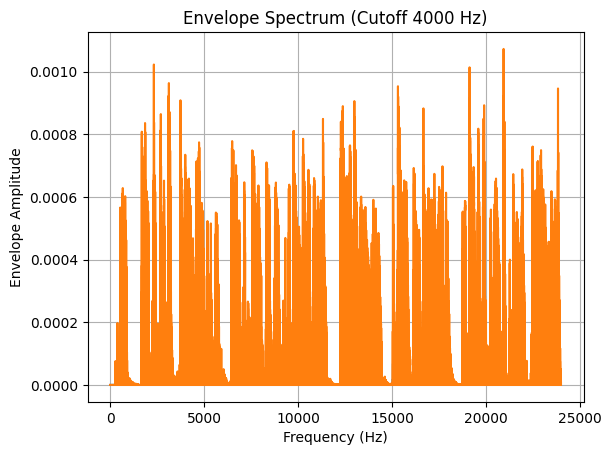

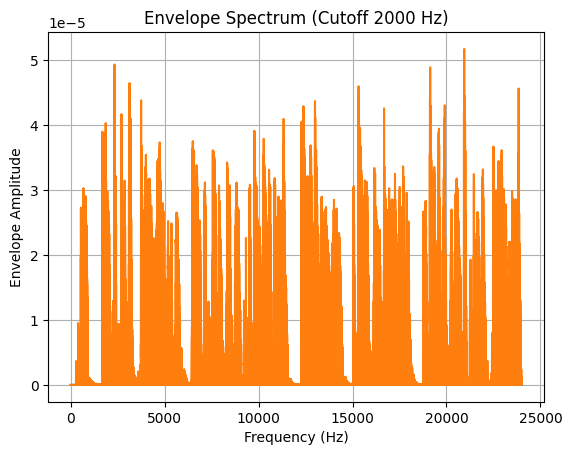

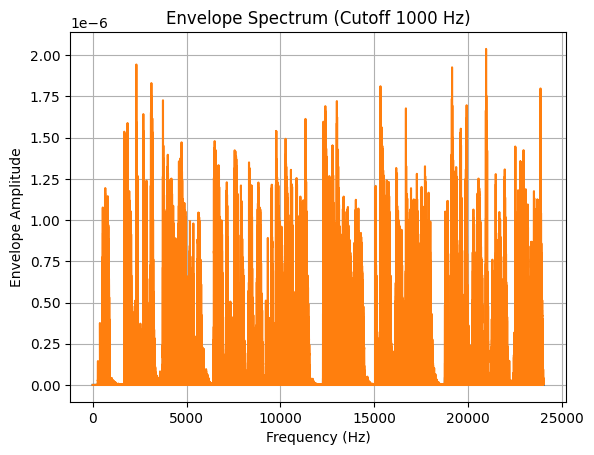

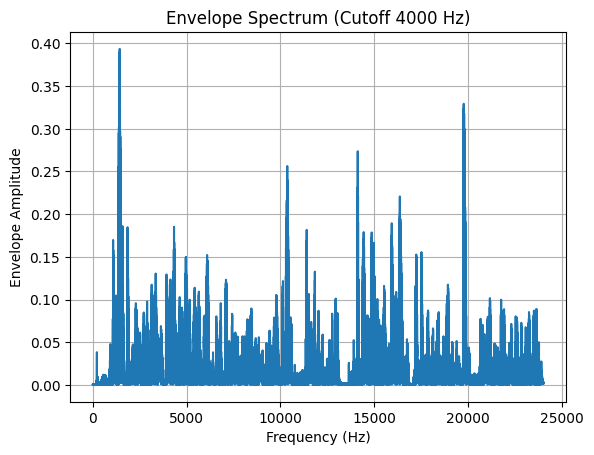

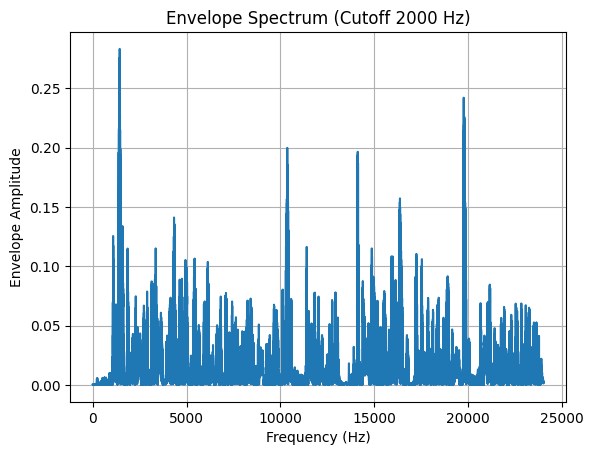

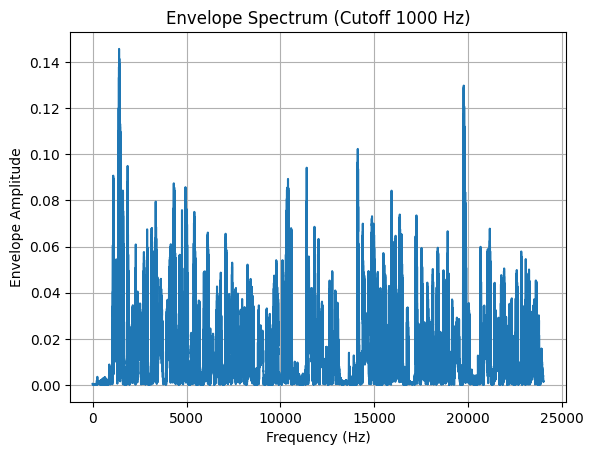

In [25]:
print("Length of freqs1:", len(freqs1))
print("Length of envelopes1:", len(envelopes1))
plot_cutoff(freqs1, envelopes1, cutoff)
plot_cutoff(freqs2, envelopes2, cutoff)
plt.show()

What we observe from the filtered and unfiltered signals is an improvement in intelligibility and perception.

Applying the LP filter to the signals means we cut off the higher frequencies in the signals, which could be related to high pitched noises or other ambient noise. Effectively increasing the cutoff frequency, means more aggressive cutoff of higher frequencies.

This also means the perception of the audio should be smoother and cleaner as there will be less noise. Though at a low cutoff frequency the sound becomes muffled and almost too much of the signal is cut off, e.g. in the case of my recording, which results in a lowered volume.

In [ ]:
# Save filtered audio
for i in range(3):
    output_simon = f"filtered_simon_{cutoff[i]}.wav"
    output_vikki = f"filtered_vikki_{cutoff[i]}.wav"

    sf.write(output_simon,filtered_data1[i],Fs1)
    sf.write(output_vikki,filtered_data2[i],Fs2)